In [1]:
import torch

from pulser import Sequence, Pulse, Register
from pulser.devices import MockDevice
from pulser.waveforms import BlackmanWaveform, RampWaveform, ConstantWaveform, Waveform
from pulser.parametrized import Parametrized
from pulser.parametrized.variable import Variable, VariableItem

from pulser_diff.model import QuantumModel

from typing import Callable, Union

from torch import Tensor

from pyqtorch.utils import SolverType
from time import time

from pulser.parametrized.paramobj import ParamObj

PyQTorch logger successfully setup with log level 20


### Toy optimization problem

In [2]:
# # create register
# reg = Register.rectangle(1, 2, spacing=8, prefix="q")

In [3]:
# # create sequence and declare channels
# seq = Sequence(reg, MockDevice)
# seq.declare_channel("rydberg_global", "rydberg_global")

In [4]:
# # define pulse parameters
# omega = torch.tensor([5.0], requires_grad=True)
# area = torch.tensor([torch.pi], requires_grad=True)

In [5]:
# # declare sequence variables
# omega_param = seq.declare_variable("omega")
# area_param = seq.declare_variable("area")

In [6]:
# # create pulses
# pulse_const = Pulse.ConstantPulse(1000, omega_param, 0.0, 0.0)
# amp_wf = BlackmanWaveform(800, area_param)
# det_wf = RampWaveform(800, 5.0, 0.0)
# pulse_td = Pulse(amp_wf, det_wf, 0)

# # add pulses
# seq.add(pulse_const, "rydberg_global")
# seq.add(pulse_td, "rydberg_global")

In [7]:
# # create quantum model from sequence
# trainable_params = {"omega": omega, "area": area}
# model = QuantumModel(seq, trainable_params, sampling_rate=0.5, solver=SolverType.KRYLOV_SE)

# # list trainable parameters of the model
# print()
# for name, param in model.named_parameters():
#     print(name)
#     print(param)
#     print('-------')

In [8]:
# # define loss function and optimizer
# loss_fn = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [9]:
# # print initial expectation value as a result of simulating initial sequence
# _, init_exp_val = model.expectation()
# print("Initial expectation value:", init_exp_val[-1])
# print()

# # optimize model parameters so that the final output expectation value matches the predefined value
# epochs = 20
# target_value = torch.tensor(-0.5, dtype=torch.float64)
# for t in range(epochs):
#     # calculate prediction and loss
#     evaluation_times, exp_val = model.expectation()
#     loss = loss_fn(exp_val.real[-1], target_value)

#     # backpropagation
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()

#     # update sequence with changed pulse parameter values
#     model.update_sequence()

#     print(f"loss: {loss:>7f}")

# # print expectation value with optimized model
# _, init_exp_val = model.expectation()
# print()
# print("Optimized expectation value:", init_exp_val[-1])
# print()

We can print the optimized values of amplitude of the constant pulse `omega` and the area of the Blackman pulse `area`:

In [10]:
# print()
# for name, param in model.named_parameters():
#     print(name)
#     print(param)
#     print('-------')

The values of both parameters were optimized in order to minimize the provided loss function

### Custom waveform shape optimization

We will now show how to create a custom parametrized pulse shape and optimize the paramters governing such waveform.

In [2]:
# create register
reg = Register.rectangle(1, 2, spacing=8, prefix="q")

# create sequence and declare channels
seq = Sequence(reg, MockDevice)
seq.declare_channel("rydberg_global", "rydberg_global")


# initial fixed sequence that we want to optimize
seq0 = Sequence(reg, MockDevice)
seq0.declare_channel("rydberg_global", "rydberg_global")
# seq0.declare_channel("rydberg_local", "rydberg_local")
seq0.add(Pulse.ConstantPulse(400, 5.0, 0.64, 1.2), "rydberg_global")
seq0.add(Pulse.ConstantPulse(300, 2.0, 0.0, 0.0), "rydberg_global")
amp_wf = RampWaveform(500, 0.0, 5.0)
det_wf = ConstantWaveform(500, 3.0)
seq0.add(Pulse(amp_wf, det_wf, 3.4), "rydberg_global")
# seq0.target("q1", "rydberg_local")
# seq0.add(Pulse.ConstantPulse(200, 2.0, 0.0, 0.0), "rydberg_local")

In [3]:
# dur_var = seq.declare_variable("dur_var")
# # amp_var1 = seq.declare_variable("amp_var1")
seq.add(Pulse.ConstantPulse(200, 2.0, 6.0, 3.0), "rydberg_global")


amp_var = seq.declare_variable("amp_var")
# # det_var = seq.declare_variable("det_var")
seq.add(Pulse.ConstantPulse(150, amp_var, 2.9, 1.2), "rydberg_global")

seq.add(Pulse.ConstantPulse(150, 4.1, 6.0, 3.0), "rydberg_global")



# phase_var = seq.declare_variable("phase_var")
seq.add(Pulse.ConstantPulse(200, 3.0, 1.0, 1.0), "rydberg_global")

seq.add(Pulse.ConstantPulse(500, amp_var, 2.9, 1.2), "rydberg_global")

# fin_amp_var = seq.declare_variable("fin_amp_var")
# amp_wf = RampWaveform(500, 0.0, fin_amp_var)
# det_wf = ConstantWaveform(500, 3.0)
# seq.add(Pulse(amp_wf, det_wf, 0), "rydberg_global")

In [4]:
trainable_param_values = {
    "dur_var": torch.tensor(200.0),
    "amp_var": torch.tensor(5.0),
}
qm = QuantumModel(seq, trainable_param_values)

Creating abstract representation: 0.0002315044403076172
Checking if duration needs to be optimized: 5.7220458984375e-06
Registering trainable params: 2.384185791015625e-07
Building sequence: 0.002830028533935547


/home/vytautas/Projects/pasqal/pulser-diff/pulser_diff/model.py:337: UserWarning: No declared variables named: dur_var
  self.built_seq = self._seq_opt.build(**self.param_values)


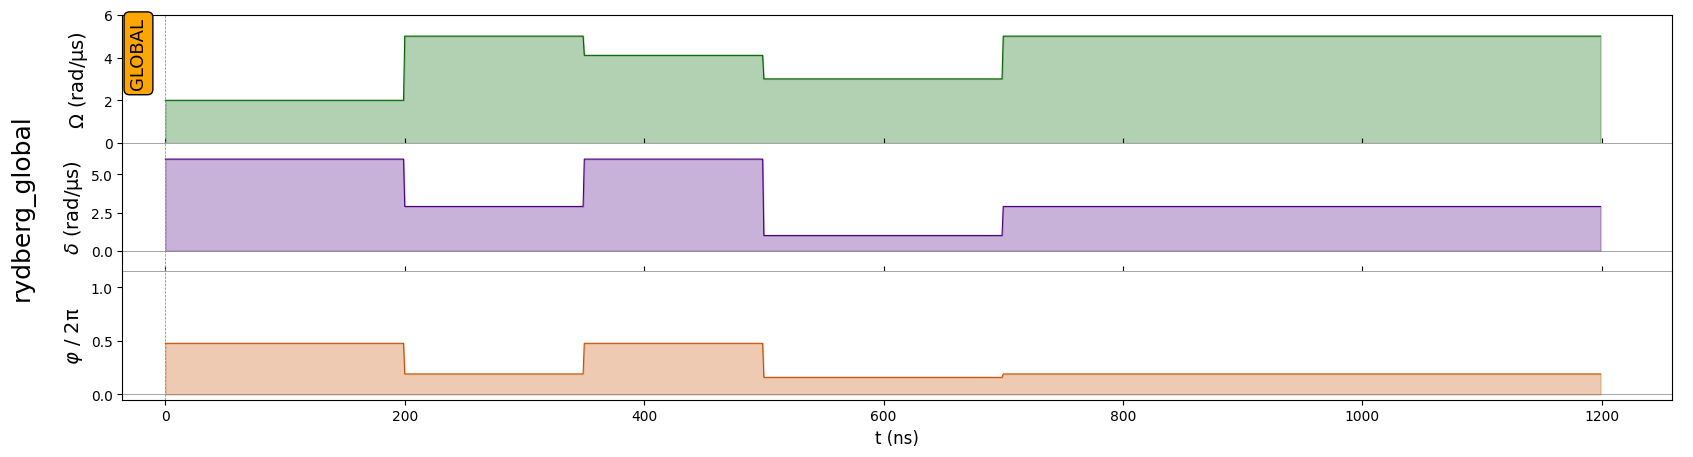

In [5]:
qm.built_seq.draw(draw_phase_curve=True)

In [15]:
raise Exception

Exception: 

In [13]:
print(seq)

Prelude
-------
Channel: rydberg_global
t: 0 | Initial targets: q0, q1 | Phase Reference: 0.0 
t: 0->200 | Pulse(Amp=2 rad/µs, Detuning=6 rad/µs, Phase=3) | Targets: q0, q1

Stored calls
------------

1. add(Pulse(ConstantWaveform(dur_var[0], amp_var[0]), ConstantWaveform(dur_var[0], 2.9), 1.2, 0.0), rydberg_global)

2. add(Pulse(ConstantWaveform(dur_var[0], 4.1), ConstantWaveform(dur_var[0], 6.0), 3.0, 0.0), rydberg_global)

3. add(Pulse(Amp=3 rad/µs, Detuning=1 rad/µs, Phase=1), rydberg_global)

4. add(Pulse(ConstantWaveform(500, amp_var[0]), 2.9, 1.2, 0.0), rydberg_global)


In [17]:
def get_abstract_repr(seq: Sequence) -> dict:
    param_dict = {}
    all_calls = [call for call in seq._calls + seq._to_build_calls if call.name == "add"]
    for i, call in enumerate(all_calls):
        pulse = call.args[0]
        d = {k: v._to_abstract_repr() if hasattr(v, "_to_abstract_repr") else v for k, v in pulse._to_abstract_repr().items()}
        param_dict[i] = d
    return param_dict

In [18]:
abs_repr = get_abstract_repr(seq)
abs_repr

{0: {'amplitude': {'kind': 'constant', 'duration': 200, 'value': array(2.)},
  'detuning': {'kind': 'constant', 'duration': 200, 'value': array(6.)},
  'phase': 3.0,
  'post_phase_shift': 0.0},
 1: {'post_phase_shift': 0.0,
  'amplitude': {'kind': 'constant',
   'duration': VariableItem(var=Variable(name='dur_var', dtype=<class 'float'>, size=1), key=0),
   'value': VariableItem(var=Variable(name='amp_var', dtype=<class 'float'>, size=1), key=0)},
  'detuning': {'kind': 'constant',
   'duration': VariableItem(var=Variable(name='dur_var', dtype=<class 'float'>, size=1), key=0),
   'value': 2.9},
  'phase': 1.2},
 2: {'post_phase_shift': 0.0,
  'amplitude': {'kind': 'constant',
   'duration': VariableItem(var=Variable(name='dur_var', dtype=<class 'float'>, size=1), key=0),
   'value': 4.1},
  'detuning': {'kind': 'constant',
   'duration': VariableItem(var=Variable(name='dur_var', dtype=<class 'float'>, size=1), key=0),
   'value': 6.0},
  'phase': 3.0},
 3: {'amplitude': {'kind': 'const

In [19]:
from dataclasses import dataclass

@dataclass()
class Parameter:
    var: Parametrized
    value: Union[int, float, None] = None
    trainable: bool = False

In [20]:
from uuid import uuid4

In [27]:
DEFAULT_DURATION = 200
DEFAULT_AMPLITUDE = 5.0
DEFAULT_DETUNING = 1.0
DEFAULT_PHASE = 2.0

def constant_waveform(ti: Union[Parametrized, int], tf: Union[Parametrized, int], value: Union[Parametrized, float], edge_steepness: float = 1.0) -> Callable:

    def pulse_envelope(t: int) -> Parametrized:
        # print("value:", value)
        if ti == 0:
            fn = value * 0.5 * (1.0 + (edge_steepness*(-(t - tf))).tanh())
        else:
            fn = value * ((0.5 * (1.0 + (edge_steepness*(t - ti)).tanh())) + (0.5 * (1.0 + (edge_steepness*(-(t - tf))).tanh())) - 1.0)

        # if ti == 0:
        #     fn = value * (1.0 / (1.0 + (edge_steepness*(t - tf)).exp()))
        # else:
        #     fn = value * (((edge_steepness*(t - ti)).exp() / (1.0 + (edge_steepness*(t - ti)).exp())) + (1.0 / (1.0 + (edge_steepness*(t - tf)).exp())) - 1.0)
        return fn
    
    return pulse_envelope


# create internal sequence and declare channels
_seq = Sequence(reg, MockDevice)
_seq.declare_channel("rydberg_global", "rydberg_global")


ti = 0
total_duration = 0
parameters = {}
envelope_fn = {
    "amplitude": [],
    "detuning": [],
    "phase": []
}
for i, pulse in enumerate(abs_repr.values()):
    duration = pulse["amplitude"]["duration"]

    # increase total duration
    if isinstance(duration, int):
        total_duration += duration
    else:
        total_duration += DEFAULT_DURATION

    # get the name of duration variable
    if isinstance(duration, VariableItem):
        var_name = duration.var.name
        value = DEFAULT_DURATION
        trainable = True
    else:
        var_name = f"dur_var_{uuid4()}"
        value = duration
        trainable = False
    
    # declare new variable
    if var_name not in parameters:
        duration_var = _seq.declare_variable(var_name)
        duration_param = Parameter(var=duration_var, value=value, trainable=trainable)
        parameters[var_name] = duration_param
    else:
        duration_var = parameters[var_name].var
    
    # end of current pulse
    tf = ti + duration_var

    # get amplitude/detuning envelope function for current pulse
    for s in ["amplitude", "detuning"]:
        wf_type = pulse[s]["kind"]
        if wf_type == "constant":
            value = pulse[s]["value"]
            if isinstance(value, VariableItem):
                var_name = value.var.name
                value = DEFAULT_AMPLITUDE if s == "amplitude" else DEFAULT_DETUNING
                trainable = True
            else:
                var_name = f"{s}_var_{uuid4()}"
                trainable = False

            # declare new variable
            if var_name not in parameters:
                var = _seq.declare_variable(var_name)
                param = Parameter(var=var, value=value, trainable=trainable)
                parameters[var_name] = param
            else:
                var = parameters[var_name].var
            fn = constant_waveform(ti, tf, var)
        else:
            raise NotImplementedError(f"{s} waveform type {wf_type} currently not supported.")
        envelope_fn[s].append(fn)

    # get phase envelope function for current pulse
    value = pulse["phase"]
    if isinstance(value, dict):
        var_name = value["lhs"].name
        value = DEFAULT_PHASE
        trainable = True
    else:
        var_name = f"phase_var_{uuid4()}"
        trainable = False
    if var_name not in parameters:
        var = _seq.declare_variable(var_name)
        param = Parameter(var=var, value=value, trainable=trainable)
        parameters[var_name] = param
    else:
        var = parameters[var_name].var
    envelope_fn["phase"].append(constant_waveform(ti, tf, var))


    # shift ti to end of pulse
    ti = tf

# add 20 ns at the end of sequence
total_duration += 10

In [28]:
for t in range(total_duration):
    # calculate amplitude value
    amp_val = sum([fn(t) for fn in envelope_fn["amplitude"]])

    # calculate detuning value
    det_val = sum([fn(t) for fn in envelope_fn["detuning"]])

    # calculate phase value
    phase_val = sum([fn(t) for fn in envelope_fn["phase"]])

    # create shortest possible pulse with given possibly parameterized values
    pulse = Pulse.ConstantPulse(1, amp_val, det_val, phase_val)
    _seq.add(pulse, "rydberg_global")

In [29]:
parameters

{'dur_var_8af99a1b-aaef-4fb7-9018-a80cae32fc79': Parameter(var=VariableItem(var=Variable(name='dur_var_8af99a1b-aaef-4fb7-9018-a80cae32fc79', dtype=<class 'float'>, size=1), key=0), value=200, trainable=False),
 'amplitude_var_c60b6bcd-c9ce-4c3d-bd63-6864a94d9efd': Parameter(var=VariableItem(var=Variable(name='amplitude_var_c60b6bcd-c9ce-4c3d-bd63-6864a94d9efd', dtype=<class 'float'>, size=1), key=0), value=array(2.), trainable=False),
 'detuning_var_57279160-2b84-4215-86cc-ea73bfa93b84': Parameter(var=VariableItem(var=Variable(name='detuning_var_57279160-2b84-4215-86cc-ea73bfa93b84', dtype=<class 'float'>, size=1), key=0), value=array(6.), trainable=False),
 'phase_var_215a80e8-9475-4d58-8e11-65f148571c88': Parameter(var=VariableItem(var=Variable(name='phase_var_215a80e8-9475-4d58-8e11-65f148571c88', dtype=<class 'float'>, size=1), key=0), value=3.0, trainable=False),
 'dur_var': Parameter(var=VariableItem(var=Variable(name='dur_var', dtype=<class 'float'>, size=1), key=0), value=200,

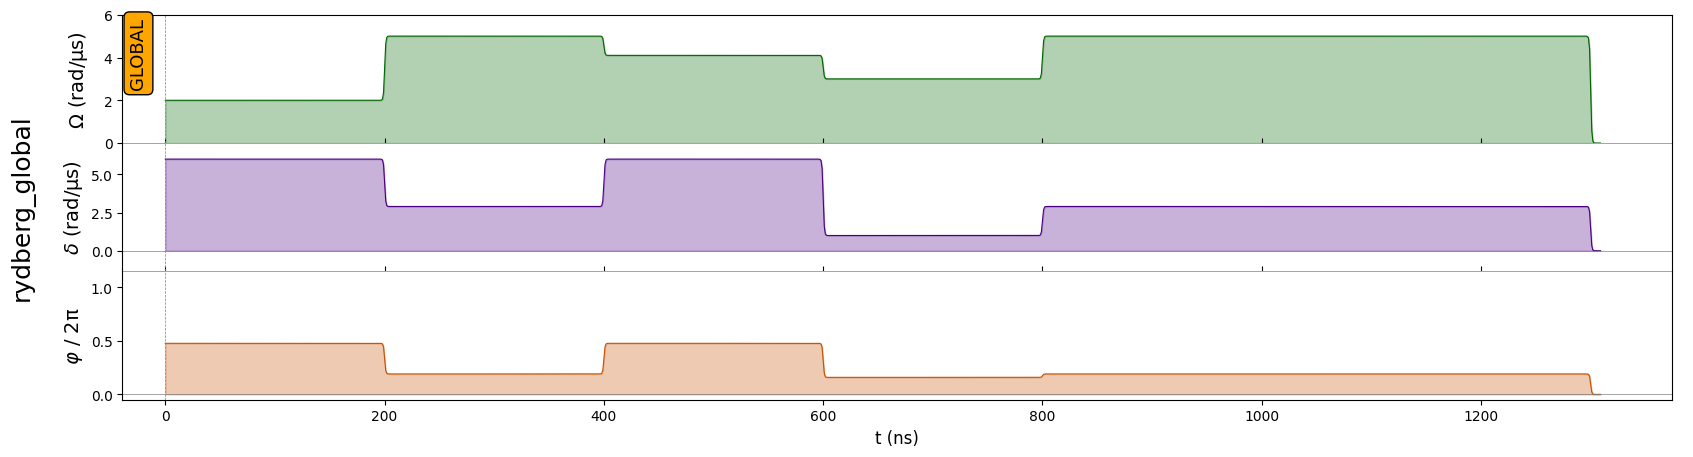

Building sequence: 2.158379316329956


In [30]:
t1 = time()
var_values = {name: p.value for name, p in parameters.items()}
_seq.build(**var_values).draw(draw_phase_curve=True)
print("Building sequence:", time() - t1)

In [22]:
var_values

{'dur_var_c2a5109a-c8f4-4895-9593-933d06dc17e5': 200,
 'amplitude_var_e6151a8d-0d19-4c4a-8fb3-5f08ba14e15c': array(2.),
 'detuning_var_b11bb3c2-f32d-456f-8f85-00127ad79ea9': array(6.),
 'phase_var_6c3c1802-e640-42ce-a046-8253aab52033': 3.0,
 'dur_var': 100,
 'amp_var': 5.0,
 'detuning_var_0d51ddfd-8d86-4254-a07b-7edd8ff735d7': 2.9,
 'phase_var_9b346cc6-0505-4bf6-b491-9ffe28d99ed1': 1.2,
 'amplitude_var_686c7cf4-84e0-4b46-a9d8-9b0310b0b9ae': 4.1,
 'detuning_var_1a4e9672-6f7f-4d4d-b4e6-3b6b5307f617': 6.0,
 'phase_var_72f788ec-e87b-4be0-bda7-6ccb16495001': 3.0,
 'dur_var_bec8768d-ca95-4eb3-bbf1-b1f80df8159e': 200,
 'amplitude_var_ff342a2f-b495-44c7-bfa0-fc37d8ed1996': array(3.),
 'detuning_var_31fa91cb-ae18-43c3-90e2-7ef021ba9a25': array(1.),
 'phase_var_7fb66cd5-7df4-4324-a63d-dc65b13b57eb': 1.0,
 'dur_var_9fe43157-e33a-4878-8b81-0c46c22a3133': 500,
 'detuning_var_9e9f38d4-4124-4081-910f-30ae9fa31b22': array(2.9),
 'phase_var_0e7cd93f-ee7c-486e-a288-335ae6202aab': 1.2}

In [21]:
raise Exception

Exception: 

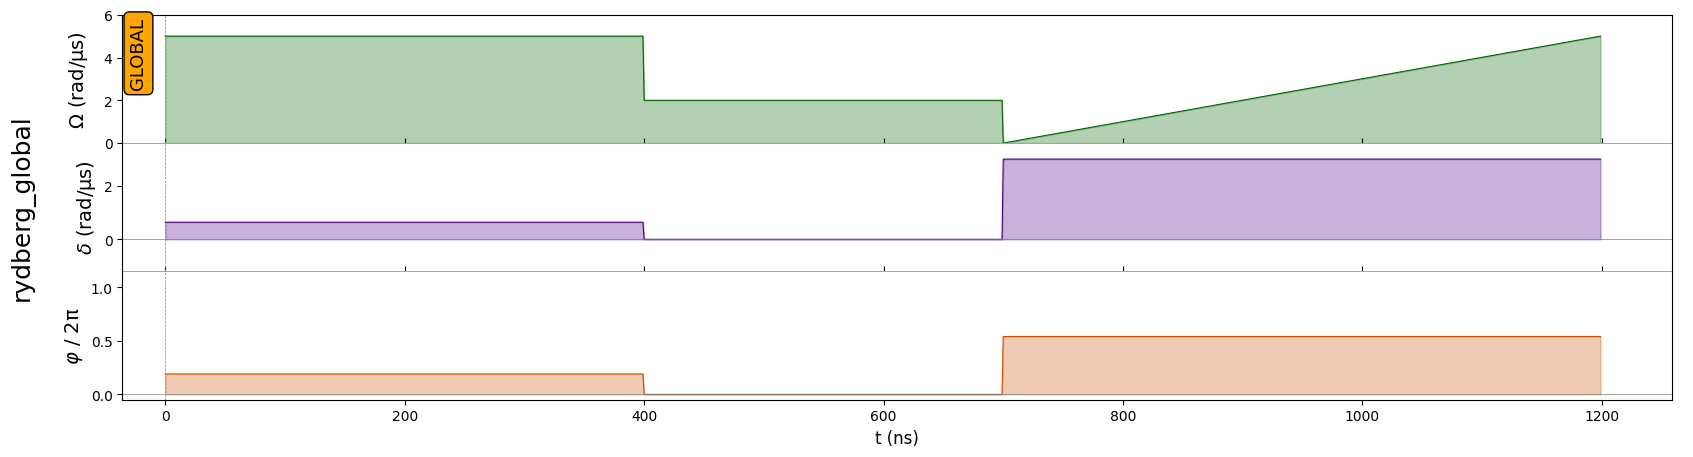

In [20]:
seq0.draw(draw_phase_curve=True)

In [21]:
from pyqtorch.utils import heaviside

x = torch.tensor(-5.0)
heaviside(x)

tensor([0.])

In [22]:
total_duration = 800

# define parameters governing the shape of custom amplitude waveform
dur1_var = seq.declare_variable("dur1")
dur2_var = seq.declare_variable("dur2")
# param1_var = seq.declare_variable("param1")
# param2_var = seq.declare_variable("param2")
# param3_var = seq.declare_variable("param3")
# param4_var = seq.declare_variable("param4")

def waveform(t: int, dur1: Parametrized, dur2: Parametrized) -> Parametrized:
    # custom waveform function
    var = (1.0 / (1.0 + (t - dur1).exp())) + 1.5 * (((t - dur1).exp() / (1.0 + (t - dur1).exp())) + (1.0 / (1.0 + (t - (dur1 + dur2)).exp())) - 1.0)
    return var

# def waveform(t: int, param1: Parametrized, param2: Parametrized, param3: Parametrized, param4: Parametrized) -> Parametrized:
#     # custom waveform function
#     var = param1 * (param4 * t/1000 - param3).cos() + param2
#     return var

variables = {"dur1": dur1_var, "dur2": dur2_var}
# variables = {"param1": param1_var, "param2": param2_var}
# variables = {"param1": param1_var, "param2": param2_var, "param3": param3_var, "param4": param4_var}
for t in range(duration):
    # define variable for each time according to some function (waveform)
    var = waveform(t, dur1_var, dur2_var)
    # var = waveform(t, param1_var, param2_var, param3_var, param4_var)
    pulse = Pulse.ConstantPulse(1, 5*var, 0.0, 0.0)
    seq.add(pulse, "rydberg_global")

[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] value: 0.0 <class 'float'>
[IN WAVEFORM] va

In [23]:
print(seq)

****************** 6.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
****************** 0.0
***********

In [24]:
# create quantum model from sequence
param1 = torch.tensor([400.0], requires_grad=True)
param2 = torch.tensor([700.0], requires_grad=True)
dur1 = torch.tensor([400.0], requires_grad=True)
dur2 = torch.tensor([300.0], requires_grad=True)
# param3 = torch.tensor([1.0], requires_grad=True)
# param4 = torch.tensor([3.0], requires_grad=True)
trainable_params = {"dur1": dur1, "dur2": dur2}
# trainable_params = {"param1": param1, "param2": param2}
# trainable_params = {"param1": param1, "param2": param2, "param3": param3, "param4": param4}
model = QuantumModel(seq, trainable_params, sampling_rate=0.5, solver=SolverType.DP5_SE)

# list trainable parameters of the model
print()
for name, param in model.named_parameters():
    print(name)
    print(param)
    print('-------')

TypeError: Did not receive values for variables: dur_var, amp_var1, amp_var

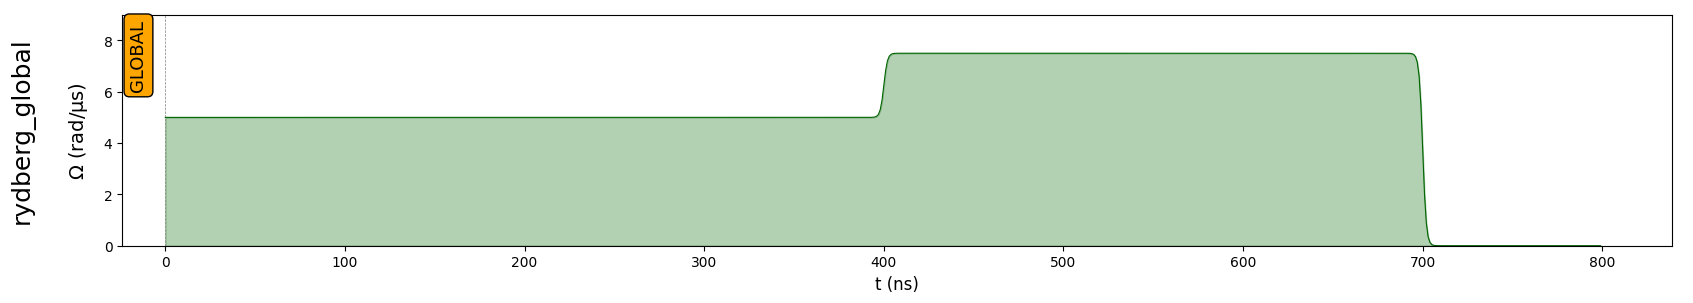

In [8]:
# draw sequence with INITIAL parameter values
model.built_seq.draw()

In [32]:
# define loss function and optimizer
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=5000.0)

In [19]:
# target_state = torch.tensor([1, 1, 1, 1], dtype=torch.complex128) / 2.0

In [20]:
# # print initial expectation value as a result of simulating initial sequence
# _, states = model()
# print("Initial state at output:", states[-1])
# print()

# # optimize model parameters so that the final output expectation value matches the predefined value
# epochs = 1000
# target_value = torch.tensor(1.0, dtype=torch.float64)
# for t in range(epochs):
#     # calculate prediction and loss
#     evaluation_times, states = model()
#     loss = loss_fn(torch.matmul(target_state, states[-1]).abs(), target_value)

#     # backpropagation
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()

#     # update sequence with changed pulse parameter values
#     model.update_sequence()

#     print(f"[t={t}] loss: {loss:>7f}")

#     if loss < 0.0001:
#         break

# # print expectation value with optimized model
# _, states = model()
# print()
# print("Optimized state at output:", states[-1])
# print()

In [21]:
# list(model.parameters())

In [22]:
# torch.matmul(target_state, states[-1]).abs()

In [33]:
# print initial expectation value as a result of simulating initial sequence
_, init_exp_val = model.expectation()
print("Initial expectation value:", init_exp_val[-1])
print()

# optimize model parameters so that the final output expectation value matches the predefined value
epochs = 100
target_value = torch.tensor(-0.5, dtype=torch.float64)
for t in range(epochs):
    # calculate prediction and loss
    evaluation_times, exp_val = model.expectation()
    loss = loss_fn(exp_val.real[-1], target_value)

    # backpropagation
    loss.backward()
    optimizer.step()
    # print("param1 gradient:", param1.grad)
    # print("param2 gradient:", param2.grad)
    optimizer.zero_grad()

    # update sequence with changed pulse parameter values
    model.update_sequence()

    print(f"[t={t}] loss: {loss:>7f}")

    if loss < 0.0001:
        break

# print expectation value with optimized model
_, init_exp_val = model.expectation()
print()
print("Optimized expectation value:", init_exp_val[-1])
print()

Initial expectation value: tensor(-1.9101+0.j, dtype=torch.complex128, grad_fn=<SelectBackward0>)

[t=0] loss: 1.988365
[t=1] loss: 0.869468
[t=2] loss: 0.042209
[t=3] loss: 0.003221
[t=4] loss: 0.000006

Optimized expectation value: tensor(-0.5000+0.j, dtype=torch.complex128, grad_fn=<SelectBackward0>)



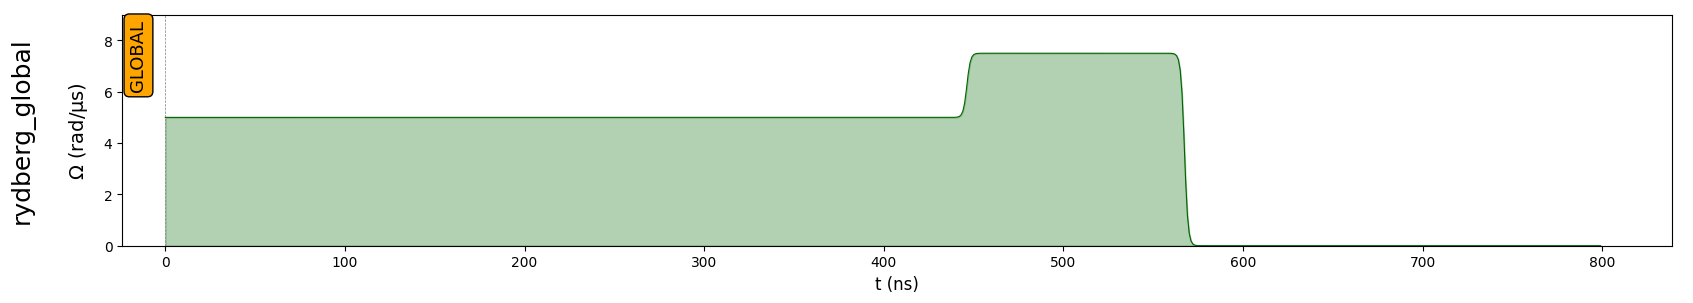

In [34]:
# draw sequence with OPTIMIZED parameter values
model.built_seq.draw()

In [35]:
print()
for name, param in model.named_parameters():
    print(name)
    print(param)
    print('-------')


trainable_params.param1
Parameter containing:
tensor([446.2346], requires_grad=True)
-------
trainable_params.param2
Parameter containing:
tensor([567.3433], requires_grad=True)
-------


As we can see the shape of the pulse changed smoothly to minimize the loss and approach the target value.

### Optimizing pulse shape to get desired state

Let us say that we want to 

In [26]:
target_state = torch.tensor([1, 1]) / torch.sqrt(torch.tensor(2.0))

In [27]:
target_state

tensor([0.7071, 0.7071])